# NLP for content based

## data preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../raw_data/rawg_games.csv')

In [4]:
list(df)

['Unnamed: 0',
 'game_id',
 'slug',
 'name',
 'description',
 'released',
 'rating',
 'detail_ratings',
 'ratings_count',
 'suggestions_count',
 'game_series_count',
 'reviews_count',
 'metacritic',
 'game_platforms',
 'game_genres',
 'game_tags',
 'developers',
 'publishers']

In [5]:
df.head(20)

,Unnamed: 0,game_id,slug,name,description,released,rating,detail_ratings,ratings_count,suggestions_count,game_series_count,reviews_count,metacritic,game_platforms,game_genres,game_tags,developers,publishers
0,0,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,High Rise is a innovative take on the match 3 ...,2020-05-16,0.0,4|recommended|1|100.0,1,27,0,1,NaN,3|iOS,"Casual, Puzzle","Space, city, friends, fun, match, cubes",181849|Florian Grolig,42334|Florian Grolig
1,1,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,High Rise is a innovative take on the match 3 ...,2020-05-16,0.0,4|recommended|1|100.0,1,27,0,1,NaN,3|iOS,"Casual, Puzzle","Space, city, friends, fun, match, cubes",181849|Florian Grolig,42334|Florian Grolig
2,2,264830,twinfold,Twinfold,<p>Twinfold delves into the duplicity of dupli...,2018-12-05,0.0,5|exceptional|2|100.0,1,101,0,2,NaN,"21|Android, 3|iOS, 4|PC, 5|macOS","Strategy, Indie, Puzzle","Singleplayer, Steam Achievements",2241|Kenny Sun,1904|Kenny Sun
3,3,58443,pocket-run-pool,Pocket-Run Pool,<p>The return of arcade pool from the creator ...,2018-05-24,0.0,4|recommended|1|100.0,1,38,0,1,NaN,3|iOS,Board Games,Singleplayer,179|Zach Gage,112|Zach Gage
4,4,51288,cinco-paus,Cinco Paus,Tens cinco varinhas mágicas mas não sabes o qu...,2017-12-25,0.0,NaN,0,44,0,0,NaN,3|iOS,"Adventure, Strategy",NaN,638|Michael Brough,488|Michael Brough
5,5,21889,desert-fox-the-battle-of-el-alamein,Desert Fox: The Battle of El Alamein,History and turn-based strategy collide in Des...,2014-06-26,0.0,4|recommended|1|100.0,1,181,0,1,NaN,3|iOS,"Strategy, Board Games","War, achievements, battle, online, Tanks, frie...",8795|Shenandoah Studio,9939|Shenandoah Studio
6,6,1190,imbroglio,Imbroglio,<strong>Imbroglio</strong> is a carefully craf...,2016-05-18,0.0,4|recommended|1|100.0,1,86,0,1,NaN,"4|PC, 3|iOS","Adventure, Strategy, Casual, Indie","Singleplayer, Full controller support","638|Michael Brough, 149959|Rostislav Pogosian","488|Michael Brough, 39838|Rostialav Pogosian"
7,7,1175,lost-frontier,Lost Frontier,"Welcome to the Outlands, Partner.<br/>\n<br/>\...",2016-06-02,0.0,"5|exceptional|1|50.0, 4|recommended|1|50.0",2,270,0,2,NaN,"21|Android, 5|macOS, 4|PC, 3|iOS","Strategy, Indie, Puzzle","Singleplayer, Steam Achievements, Steam Cloud,...",23963|Mika Mobile,81|Mika Mobile
8,8,326668,p1-select,P1 Select,<p>New mini roguelike &quot;broughlike&quot; g...,2019-06-09,0.0,5|exceptional|1|100.0,0,8,0,1,NaN,"3|iOS, 4|PC","Strategy, Puzzle",Roguelike,"638|Michael Brough, 35262|smestorp",488|Michael Brough
9,9,311050,twelvesmith,Twelvesmith,<p>An addictive number merging puzzle to chall...,2019-04-18,0.0,NaN,0,30,0,0,NaN,3|iOS,"Strategy, Puzzle","numbers, match-grouping",5069|FlippFly,10342|Flippfly


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17695 entries, 0 to 17694
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17695 non-null  int64  
 1   game_id            17695 non-null  int64  
 2   slug               17695 non-null  object 
 3   name               17695 non-null  object 
 4   description        17601 non-null  object 
 5   released           17000 non-null  object 
 6   rating             17695 non-null  float64
 7   detail_ratings     14926 non-null  object 
 8   ratings_count      17695 non-null  int64  
 9   suggestions_count  17695 non-null  int64  
 10  game_series_count  17695 non-null  int64  
 11  reviews_count      17695 non-null  int64  
 12  metacritic         3830 non-null   float64
 13  game_platforms     17693 non-null  object 
 14  game_genres        17263 non-null  object 
 15  game_tags          17155 non-null  object 
 16  developers         174

In [7]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def replace_slash(text):
    punctuations = string.punctuation.replace("|", "")+'•'
    for punctuation in punctuations:
        text = text.replace(punctuation, ' ')
    text = text.replace('br', '')
    return text.lower()

In [8]:
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer([
#                                 ('replace_slash', replace_slash, ['slug']),
#                                 ('replace_comma', replace_comma, ['game_genres',
#                                                                   'game_tags',
#                                                                   'description',
#                                                                   'developers',
#                                                                   'publishers'])])

In [9]:
df["slug"] = df["slug"].astype(str)
df["game_genres"] = df["game_genres"].astype(str)
df["game_tags"] = df["game_tags"].astype(str)
df["description"] = df["description"].astype(str)
df["developers"] = df["developers"].astype(str)
df["publishers"] = df["publishers"].astype(str)

In [10]:
# df['metadata'] = df[['slug',
#                      'game_genres',
#                      'game_tags',
#                      'description',
#                      'developers',
#                      'publishers']].apply(lambda x: ' '.join(x, axis = 1)

In [11]:
df['metadata']=df["slug"]+' '+df["game_genres"]+' '+df["game_tags"]+' '+df["description"]+' '+df["developers"]+' '+df["publishers"]

In [12]:
df['metadata']

0        high-rise-a-puzzle-cityscape Casual, Puzzle Sp...
1        high-rise-a-puzzle-cityscape Casual, Puzzle Sp...
2        twinfold Strategy, Indie, Puzzle Singleplayer,...
3        pocket-run-pool Board Games Singleplayer <p>Th...
4        cinco-paus Adventure, Strategy nan Tens cinco ...
                               ...                        
17690    gocco-of-war Action, Casual, Indie Singleplaye...
17691    conquest-of-elysium-4 Strategy, Indie Singlepl...
17692    dominions-5-warriors-of-the-faith Strategy, In...
17693    red-faction-battlegrounds Action, Shooter, Arc...
17694    super-stardust-ultra nan exclusive, true exclu...
Name: metadata, Length: 17695, dtype: object

In [13]:
df['metadata']=df['metadata'].apply(lambda x: replace_slash(x))

In [14]:
df['metadata'][0]

'high rise a puzzle cityscape casual  puzzle space  city  friends  fun  match  cubes high rise is a innovative take on the match 3 genre  a relaxed casual puzzle experience  match colourful cubes and watch them merge  grow and your 3d puzzle cityscape rise       the game is complete in its free version but will show you ads occasionally  those who prefer an add free experience can remove them with the cheapest possible in app purchase and also support us updating this game and creating new ones    no hidden costs or cheap tricks        easily rotate your 3d city with a swipe of your finger  place cubes with a tab and let them merge and grow higher  and higher  and higher       simple and engaging gameplay that is easy to learn but leaves a lot of space for your own tactics and personal improvement         innovative but easy gameplay     simple and fun mechanics     a relaxed puzzle experience     see your colorful city grow     compare your city score with your friends and the whole w

# key word countverctorizer

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(stop_words='english')

meta_tf = tf_idf_vectorizer.fit_transform(df['metadata'])

In [84]:
meta_df=pd.DataFrame(meta_tf.toarray(), index=df.name.tolist())

In [85]:
dict_word = tf_idf_vectorizer.vocabulary_

In [86]:
df_word = pd.DataFrame(index=dict_word.keys())

In [87]:
df_word['count']=dict_word.values()

In [88]:
df_word.sort_values('count', ascending=False)

,count
ｏperate,95770
ｌｅｍｏｎ,95769
ｃａｓｉｏｐｅａ,95768
ｂａｌｍ,95767
ａｅｓｔｈｅｔｉｃ,95766
...,...
00019064,4
0001,3
0000,2
000,1


In [ ]:
df_word[df_word.index == "Mario"]

In [90]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=300)
trained = svd.fit(meta_df)
latent_df = svd.fit_transform(meta_df)

In [91]:
latent_df

array([[ 0.05924132, -0.09867764, -0.04325152, ..., -0.02272284,
        -0.02253024, -0.02279844],
       [ 0.05924132, -0.09867764, -0.04325152, ..., -0.02272284,
        -0.02253024, -0.02279844],
       [ 0.03671193, -0.05331593, -0.02193281, ...,  0.00442113,
         0.00051878,  0.00301098],
       ...,
       [ 0.06652649, -0.12053429, -0.0606289 , ...,  0.017687  ,
        -0.01109564, -0.0249085 ],
       [ 0.05330206, -0.12942894, -0.09230904, ..., -0.02433437,
         0.01788769, -0.01555888],
       [ 0.05001268, -0.14422524, -0.11255685, ..., -0.01113584,
        -0.01172035, -0.03099273]])

In [92]:
latent_df.min(), latent_df.max()

(-0.3918424430619354, 0.8421249655713905)

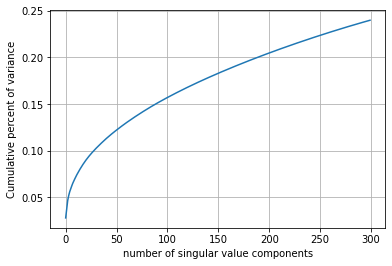

In [93]:
import matplotlib.pyplot as plt
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [94]:
# from sklearn.feature_extraction.text import CountVectorizer
# count1 = CountVectorizer(stop_words='english', min_df = 0.05)
# count_matrix1 = count1.fit_transform(df['metadata'])
# count_df1 = pd.DataFrame(count_matrix1.toarray(), index=df.index.tolist())
# count_df1.head()

In [95]:
# # Apply SVD
# svd1 = TruncatedSVD(n_components=200)
# latent_df1 = svd1.fit_transform(count_df1)

In [96]:
# latent_df1

In [97]:
# latent_df1.min(), latent_df1.max()

In [98]:
# Plot variance as a function of the number of components.
# plt.plot(svd1.explained_variance_ratio_.cumsum())
# plt.xlabel('number of singular value components')
# plt.ylabel('Cumulative percent of variance')   
# plt.grid()
# plt.show()

In [99]:
n = 200 
latent_df_t = pd.DataFrame(latent_df[:,0:n], index=df.name.tolist())
latent_df_t

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
High Rise - A Puzzle Cityscape,0.059241,-0.098678,-0.043252,-0.027681,0.053225,-0.043165,0.009269,0.076520,-0.013904,0.018120,...,0.010160,-0.026469,-0.038830,-0.017434,-0.042046,-0.004173,-0.059845,-0.008721,0.009295,-0.038391
High Rise - A Puzzle Cityscape,0.059241,-0.098678,-0.043252,-0.027681,0.053225,-0.043165,0.009269,0.076520,-0.013904,0.018120,...,0.010160,-0.026469,-0.038830,-0.017434,-0.042046,-0.004173,-0.059845,-0.008721,0.009295,-0.038391
Twinfold,0.036712,-0.053316,-0.021933,-0.027302,0.001452,-0.012312,-0.028165,0.016866,-0.007525,-0.029089,...,-0.021862,-0.008213,-0.006706,-0.017697,0.004075,0.016291,0.009686,0.012110,0.011093,0.006780
Pocket-Run Pool,0.275126,0.054274,-0.052039,0.010275,-0.020791,-0.044635,0.035320,0.025276,0.009849,0.005479,...,-0.001230,0.029569,-0.030070,0.014490,-0.004649,0.014846,0.025262,0.073461,-0.002255,0.002717
Cinco Paus,0.003935,-0.008184,-0.004574,-0.000685,0.004475,0.005887,0.004972,0.001402,0.011116,-0.005815,...,0.000467,-0.002959,-0.009279,-0.004199,0.002674,0.001538,0.007218,0.003869,0.002532,0.006478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GOCCO OF WAR,0.562704,0.115291,-0.107238,0.003512,-0.049670,0.004680,-0.019695,0.006923,-0.017762,-0.003998,...,-0.012412,-0.010654,-0.016242,0.007898,-0.001174,0.010885,0.005833,-0.031799,0.002581,0.003657
Conquest of Elysium 4,0.078480,-0.131377,-0.062086,-0.035583,-0.068308,0.081478,0.010758,0.035251,-0.006790,-0.038998,...,0.000351,0.000918,0.012708,-0.018311,-0.011705,-0.011807,-0.007294,0.040728,0.002756,0.010325
Dominions 5 - Warriors of the Faith,0.066526,-0.120534,-0.060629,-0.014283,-0.080505,0.074964,0.019806,0.044630,-0.003185,-0.053502,...,0.013479,0.055630,-0.008299,0.007792,-0.004832,-0.011944,0.022244,0.010961,0.016255,-0.023485
Red Faction: Battlegrounds,0.053302,-0.129429,-0.092309,0.317636,0.002361,-0.002135,-0.050718,-0.001825,-0.094748,0.012469,...,0.004205,-0.039920,-0.004415,-0.053952,-0.030475,-0.035713,-0.018707,-0.021174,-0.019683,-0.025967


In [100]:
# n = 200 
# latent_df1 = pd.DataFrame(latent_df1[:,0:n], index=df.name.tolist())
# latent_df1.shape

# similarity ranking of given game

## similarity with TF

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
v1 = np.array(latent_df_t.loc["Mario Kart 8"]).reshape(1, -1)

In [103]:
sim1 = cosine_similarity(latent_df_t, v1).reshape(-1)

In [104]:
sim1

array([0.07707877, 0.07707877, 0.05040066, ..., 0.11586065, 0.08096636,
       0.1846545 ])

In [105]:
dictDf = {'content': sim1} 
recommendation_df = pd.DataFrame(dictDf, index = latent_df_t.index)

In [106]:
recommendation_df.sort_values('content', ascending=False, inplace=True)
recommendation_df.head(10).reset_index()

,index,content
0,Mario Kart 8,1.000000
1,Mario Kart DS,0.782149
2,Mario Kart 64 (1996),0.781009
3,Super Mario Galaxy 2,0.718502
4,Mario Kart 8 Deluxe,0.711358
5,Mario Bros. (1983),0.711198
6,Super Mario 3D All-Stars,0.710345
7,Super Mario Bros.,0.702629
8,Super Mario Kart,0.700127
9,Super Mario Galaxy,0.699342


In [107]:
recommendation_df.head(10).reset_index().to_dict()

{'index': {0: 'Mario Kart 8',
  1: 'Mario Kart DS',
  2: 'Mario Kart 64 (1996)',
  3: 'Super Mario Galaxy 2',
  4: 'Mario Kart 8 Deluxe',
  5: 'Mario Bros. (1983)',
  6: 'Super Mario 3D All-Stars',
  7: 'Super Mario Bros.',
  8: 'Super Mario Kart',
  9: 'Super Mario Galaxy'},
 'content': {0: 1.0000000000000002,
  1: 0.7821486283955407,
  2: 0.7810087713598918,
  3: 0.7185021383594588,
  4: 0.7113581114268901,
  5: 0.7111975255651095,
  6: 0.7103453871775114,
  7: 0.702629123113432,
  8: 0.7001269709555276,
  9: 0.6993424625940847}}

In [108]:
def fit_value(game_name):
    tmp_= df[df['name'] == 'Pokémon Platinum']
    genres = tmp_['game_genres']
    tags = tmp_['game_tags']
    return genres, tags

In [109]:
recommendation_df[['genres', 'tags']] = recommendation_df.index.map(lambda x: fit_value(x))

TypeError: 'Series' objects are mutable, thus they cannot be hashed

## Similarity with CV

In [ ]:
v2 = np.array(latent_df1.loc['Pokémon Platinum']).reshape(1, -1)
sim2 = cosine_similarity(latent_df1, v2).reshape(-1)

dictDf2 = {'content': sim2} 
recommendation_df2 = pd.DataFrame(dictDf2, index = latent_df1.index)

recommendation_df2.sort_values('content', ascending=False, inplace=True)
recommendation_df2.head(10)

# test of the creation of class

## class of get meta data

In [ ]:
class GetMetadata(object):
    def __init__(self,columns):
        self.columns = columns
        self.df = None

    def get_games(self):
        self.df = pd.read_csv('../raw_data/rawg_games.csv')
#         return self.df.head(1)

    def stringfy_columns(self):
#         print(self.columns)
        for column in self.columns:
            self.df[column] = self.df[column].astype(str)
#             print(type(self.df[column][0]))
#             print(self.df[column][0])

    def merge_metadata(self):
        self.df['metadata'] = ''
        for column in self.columns:
#             print(type(self.df[column][0]))
            self.df['metadata'] += (self.df[column] + ' ')
#         print(self.df['metadata'][0])
#         print(type(self.df['metadata'][0]))
        

    def replace_punctuations(self, text):
        punctuations = string.punctuation.replace("|", "")+'•'
        for punctuation in punctuations:
            text = text.replace(punctuation, ' ')
        text = text.replace('br', '')
        return text.lower()

    def create_metadata(self):
        self.get_games()
        self.stringfy_columns()
        self.merge_metadata()
#         print(self.df['metadata'][0])
        self.df['metadata'] = self.df['metadata'].apply(lambda x: self.replace_punctuations(x))
        return self.df['metadata']

In [ ]:
COLUMNS = ['developers',
           'publishers']
get_metadata = GetMetadata(COLUMNS)
meta = get_metadata.create_metadata()

In [ ]:
meta

In [ ]:
# print(pd.read_csv('../raw_data/rawg_games.csv').head(5))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count1 = CountVectorizer(stop_words='english', min_df = 0.01)
count_matrix1 = count1.fit_transform(meta)
count_df1 = pd.DataFrame(count_matrix1.toarray(), index=df.index.tolist())
count_df1.head()

In [ ]:
tt.fit_svd()
tt.fit_tf_idf()